# CodersCave

***TASK:-***     
Breast Cancer Prediction
The objective of this project is to create a predictive model that can accurately classify breast
cancer cases as benign or malignant based on a set of relevant features. By leveraging
historical data and applying machine learning techniques, we aim to develop a reliable tool for
assisting medical professionals in diagnosing breast cancer.

# Importing Neccessary Libraries

In [37]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, BatchNormalization, Dropout, Flatten, Dense, Bidirectional, GRU
from tensorflow.keras.optimizers import Adam
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, BatchNormalization, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from kerastuner.tuners import Hyperband

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
from sklearn import datasets,metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Built-in Sklearn Breast Cancer Dataset

In [40]:
cancerData = datasets.load_breast_cancer()
cancerData

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [41]:
X = pd.DataFrame(data = cancerData.data, columns=cancerData.feature_names )
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [42]:
y = cancerData.target

In [43]:
X.shape

(569, 30)

# Data Visualisation

In [44]:
# Convert to a pandas DataFrame for easy visualization
import pandas as pd
df = pd.DataFrame(cancerData.data, columns=cancerData.feature_names)
df['target'] = cancerData.target


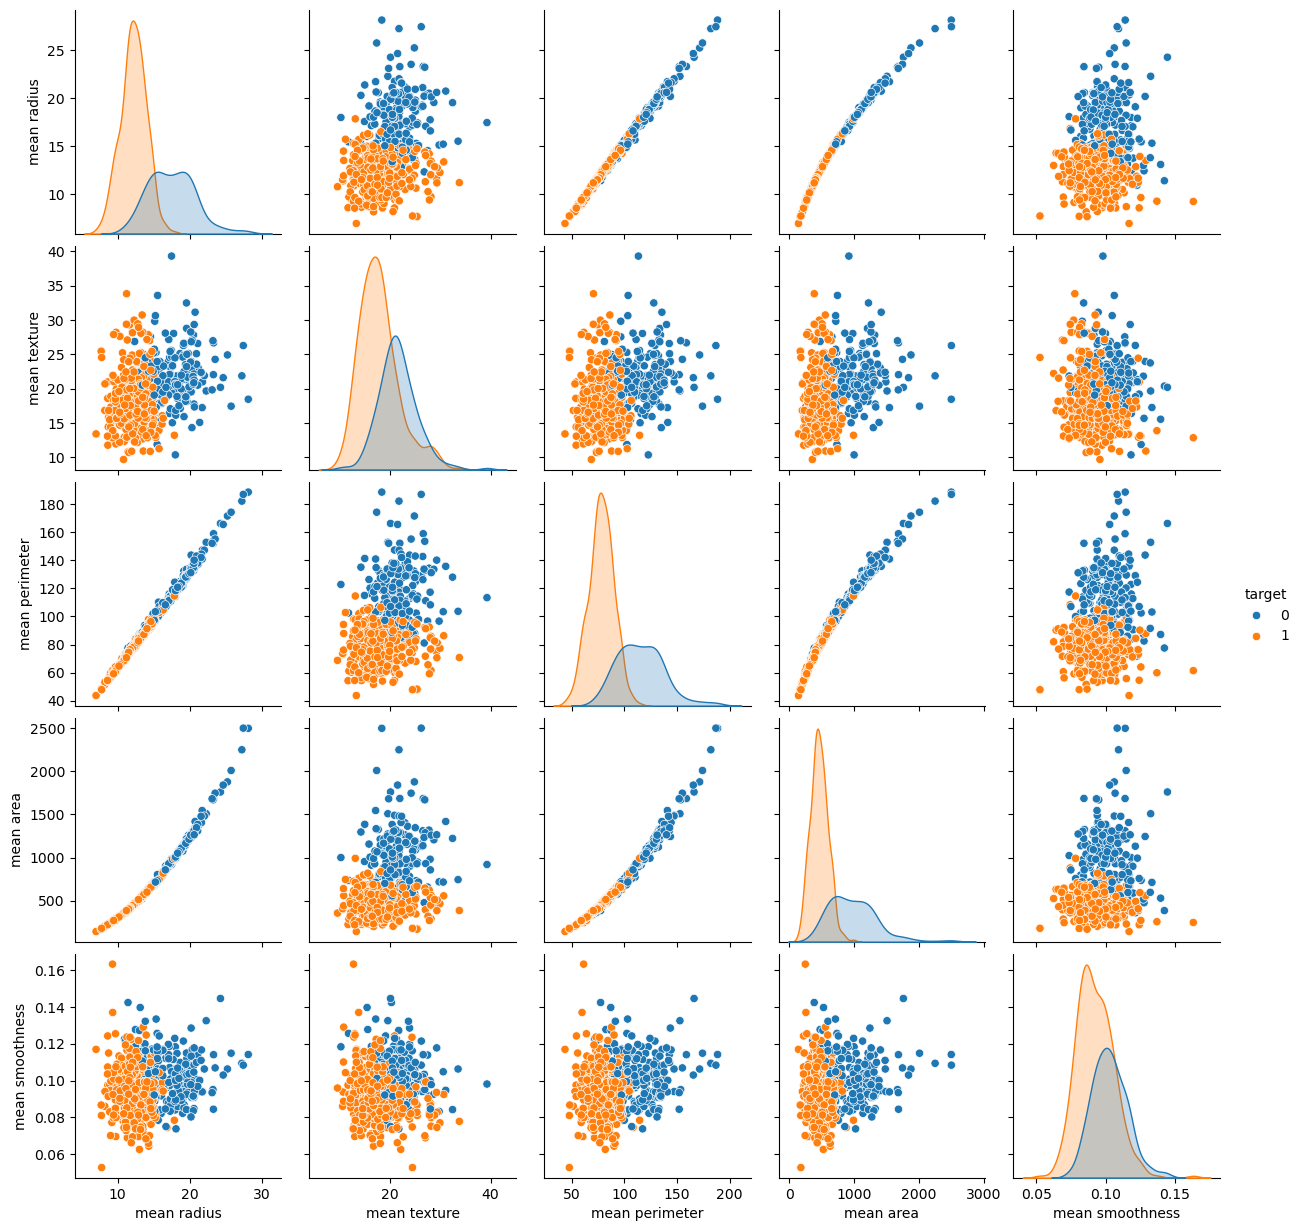

In [45]:
# Visualize features using a pair plot
sns.pairplot(df, hue='target', vars=cancerData.feature_names[:5])
plt.show()

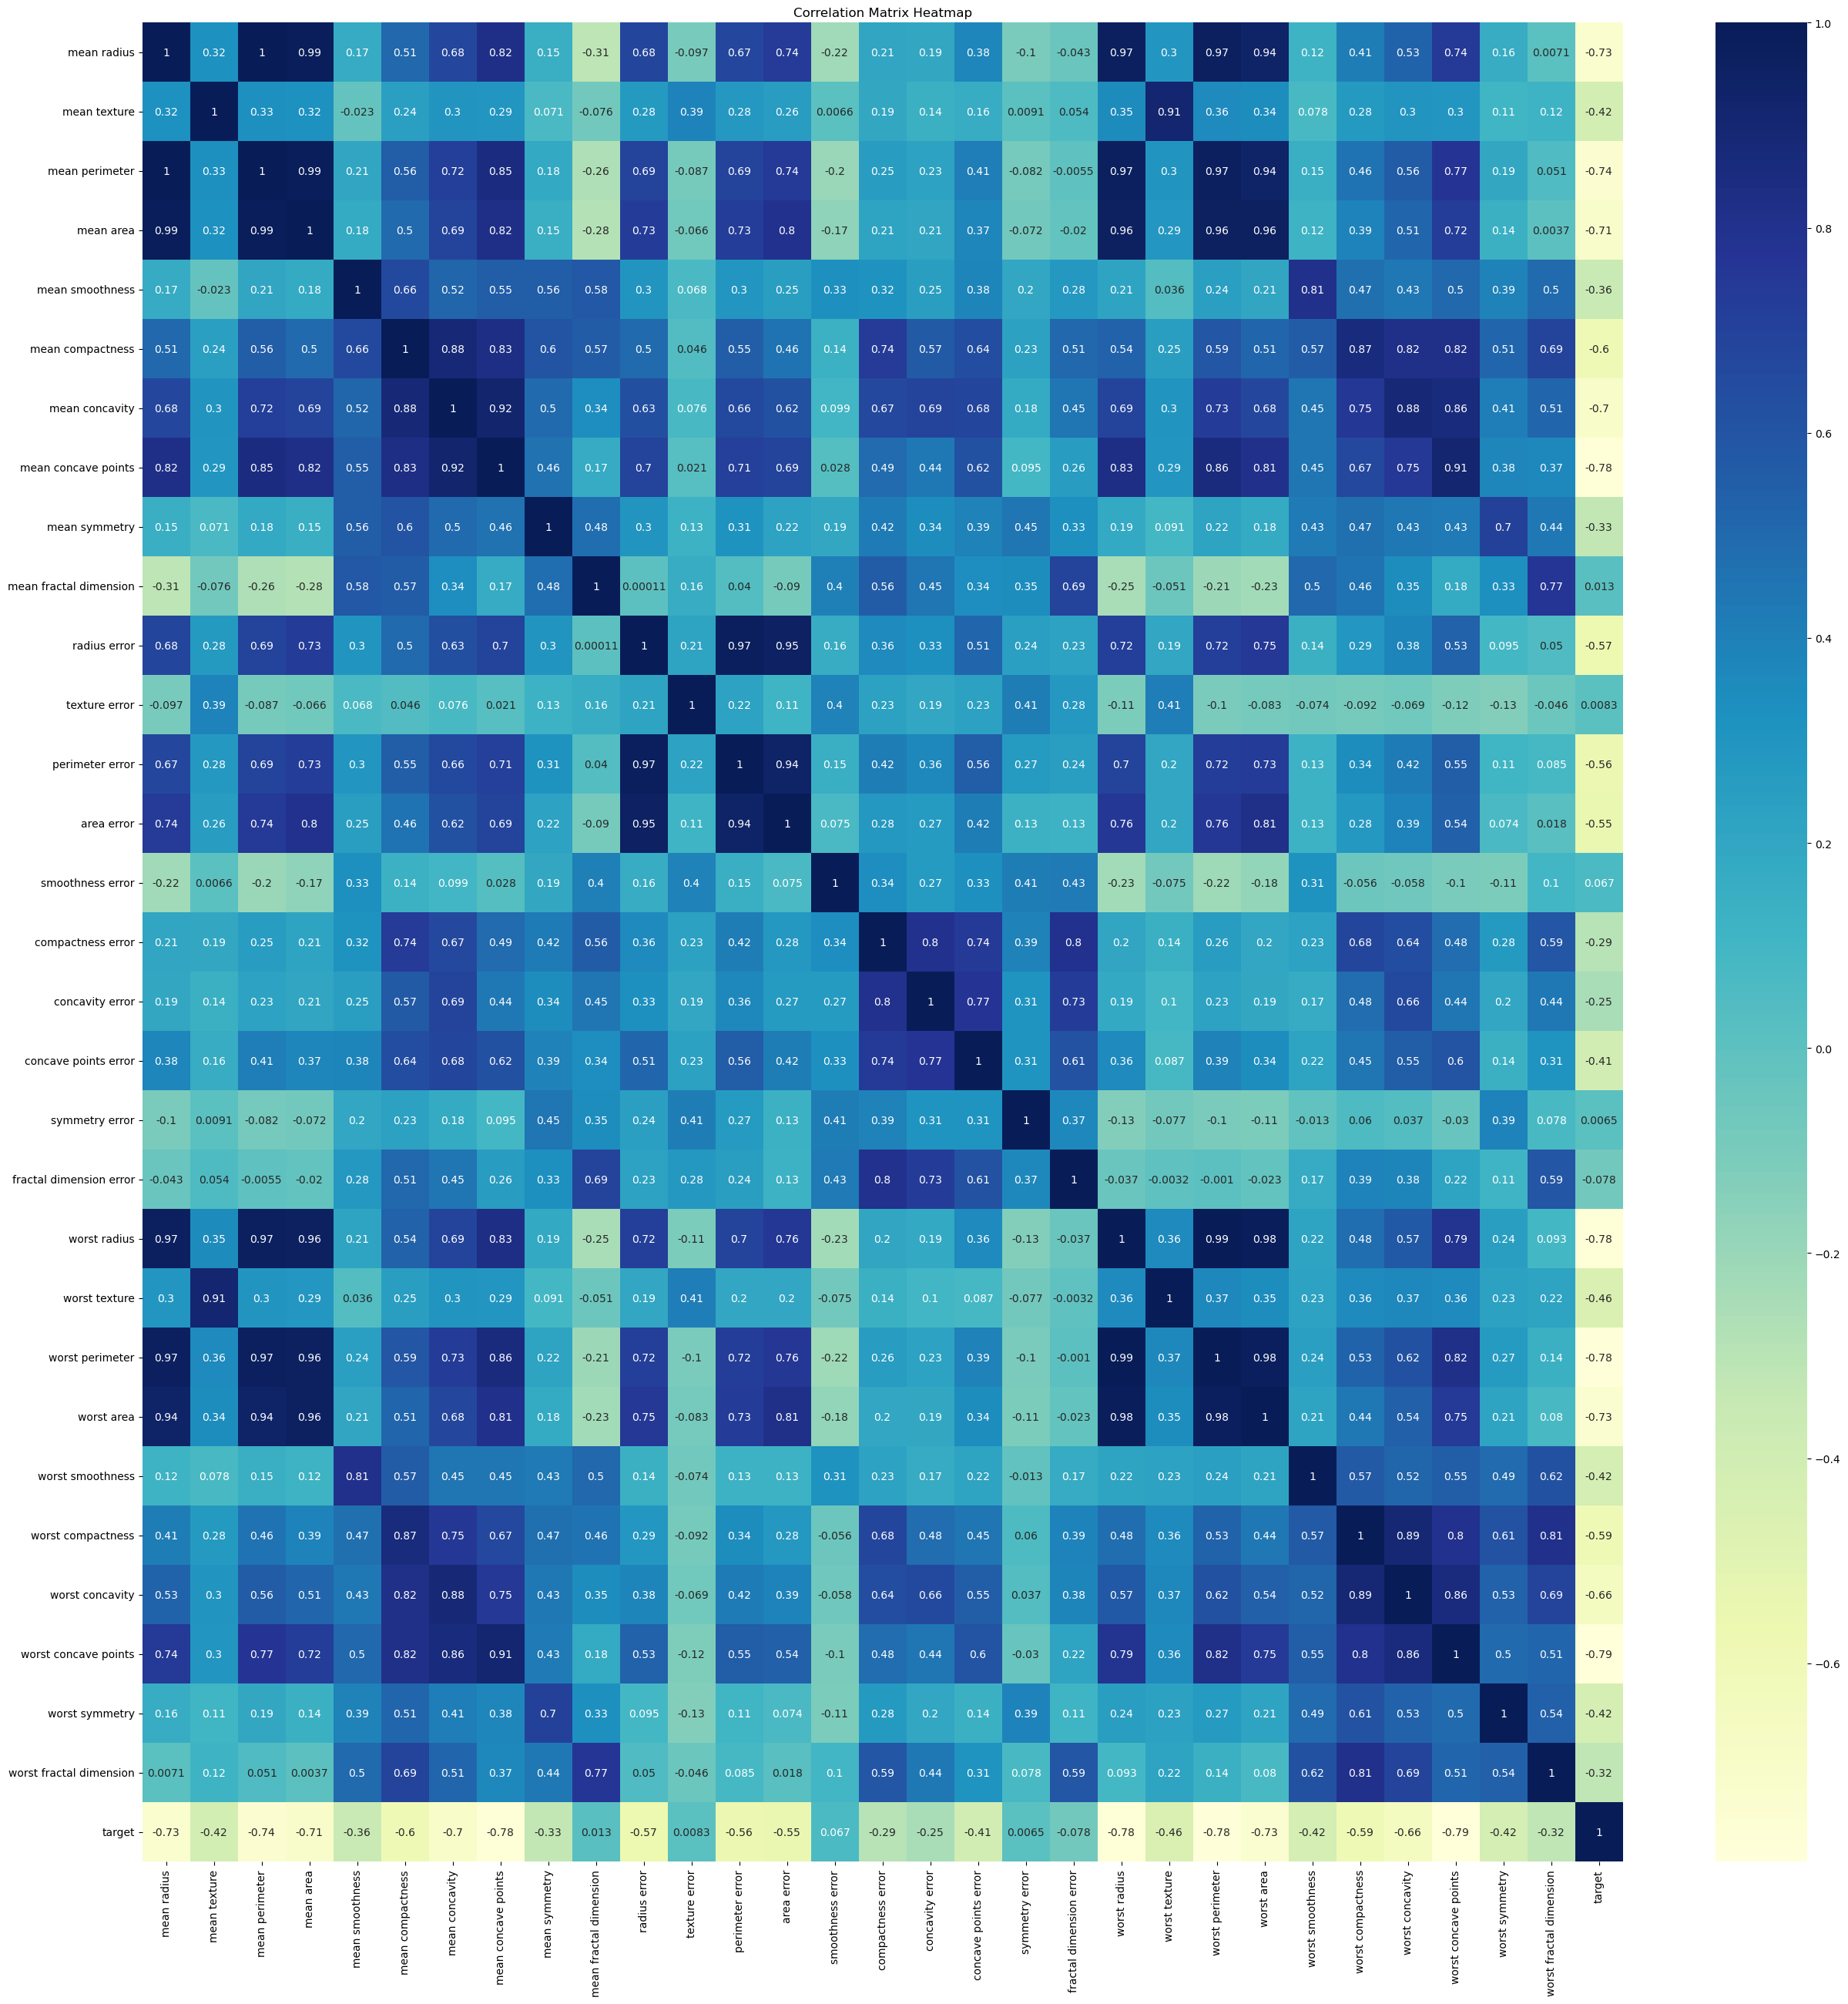

In [46]:
# Visualize a correlation matrix heatmap
plt.figure(figsize=(31, 31))
sns.heatmap(df.corr(), cmap='YlGnBu', annot=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Splitting into Train and Test datasets

In [47]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.1,stratify=y)

In [48]:
X_train.shape

(512, 30)

In [49]:
y_test.shape

(57,)

# Applying StandardScaler()

In [50]:
scaler = StandardScaler()

In [51]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshaping the dataset to 3-D to pass it through CNN

In [52]:
X_train = X_train.reshape(512,30,1)
X_test = X_test.reshape(57,30,1)

# Preparing the Model

In [53]:
def build_model(hp):
    model = Sequential()

    model.add(Bidirectional(GRU(units=hp.Int('gru_units', min_value=32, max_value=128, step=32), activation='relu', return_sequences=True), input_shape=(30, 1)))
    model.add(Conv1D(filters=hp.Int('filters_1', min_value=8, max_value=64, step=8), kernel_size=2, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(hp.Float('dropout_1', min_value=0.2, max_value=0.5, step=0.1)))

    model.add(Conv1D(filters=hp.Int('filters_2', min_value=16, max_value=128, step=16), kernel_size=2, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(hp.Float('dropout_2', min_value=0.2, max_value=0.5, step=0.1)))

    model.add(Flatten())
    model.add(Dense(hp.Int('dense_units', min_value=32, max_value=128, step=32), activation='relu'))
    model.add(Dropout(hp.Float('dropout_dense', min_value=0.2, max_value=0.5, step=0.1)))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[0.01, 0.001, 0.0001])),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

# Instantiate the tuner and perform the search
tuner = Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=10,  # The maximum number of epochs to train each model (adjust as needed)
    factor=3,  # Factor by which to reduce the number of models and the epochs to train each model
    directory='keras_tuner',
    project_name='cnn_BI-GRU_tuner'
)

In [54]:
# Define the search space and start the search
tuner.search_space_summary()
tuner.search(x=X_train, y=y_train, epochs=10, validation_data=(X_test, y_test))
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

Trial 30 Complete [00h 00m 06s]
val_accuracy: 0.9824561476707458

Best val_accuracy So Far: 0.9824561476707458
Total elapsed time: 00h 01m 55s


In [55]:
best_model = tuner.hypermodel.build(best_hps)

In [62]:
history = best_model.fit(X_train, y_train, epochs=64, validation_data=(X_test, y_test),verbose=1)

Epoch 1/64
 1/16 [>.............................] - ETA: 0s - loss: 0.0011 - accuracy: 1.0000

16/16 [==============================] - 0s 20ms/step - loss: 0.0071 - accuracy: 0.9980 - val_loss: 0.1462 - val_accuracy: 0.9649
Epoch 2/64
16/16 [==============================] - 0s 18ms/step - loss: 0.0052 - accuracy: 0.9961 - val_loss: 0.1609 - val_accuracy: 0.9649
Epoch 3/64
16/16 [==============================] - 0s 18ms/step - loss: 0.0100 - accuracy: 0.9961 - val_loss: 0.1690 - val_accuracy: 0.9649
Epoch 4/64
16/16 [==============================] - 0s 18ms/step - loss: 0.0046 - accuracy: 0.9980 - val_loss: 0.1719 - val_accuracy: 0.9649
Epoch 5/64
16/16 [==============================] - 0s 19ms/step - loss: 0.0167 - accuracy: 0.9941 - val_loss: 0.1596 - val_accuracy: 0.9649
Epoch 6/64
16/16 [==============================] - 0s 19ms/step - loss: 0.0084 - accuracy: 0.9941 - val_loss: 0.1896 - val_accuracy: 0.9649
Epoch 7/64
16/16 [==============================] - 0s 19ms/step - loss: 0.0064 - accuracy: 1.0000 - val_loss: 0.1314 - val_accuracy: 0.9825
Epoch 8/64
16/16 [======

In [57]:
best_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_1 (Bidirectio  (None, 30, 128)          25728     
 nal)                                                            
                                                                 
 conv1d_2 (Conv1D)           (None, 29, 24)            6168      
                                                                 
 batch_normalization_2 (Batc  (None, 29, 24)           96        
 hNormalization)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 29, 24)            0         
                                                                 
 conv1d_3 (Conv1D)           (None, 28, 64)            3136      
                                                                 
 batch_normalization_3 (Batc  (None, 28, 64)          

# Plots of Accuracy and Loss

In [58]:
def plotLearningCurve(history,epochs):
  epochRange = range(1,epochs+1)
  plt.plot(epochRange,history.history['accuracy'])
  plt.plot(epochRange,history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

  plt.plot(epochRange,history.history['loss'])
  plt.plot(epochRange,history.history['val_loss'])
  plt.title('Model Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

In [63]:
# Evaluate the model on the test set
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)

print(f'Test Accuracy: {test_accuracy*100:.2f}%')
print(f'Test Loss: {test_loss:.4f}')

2/2 [==============================] - 0s 7ms/step - loss: 0.0969 - accuracy: 0.9649
Test Accuracy: 96.49%
Test Loss: 0.0969


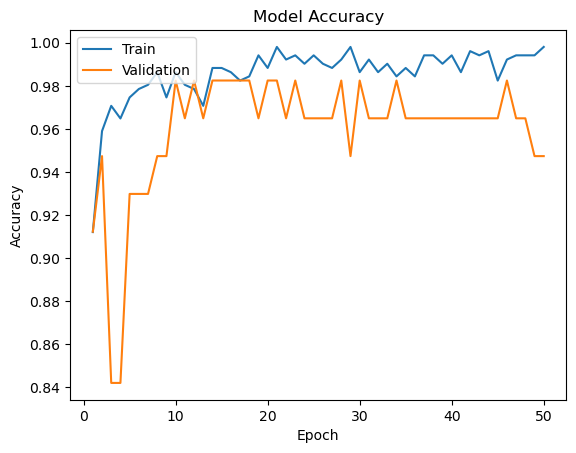

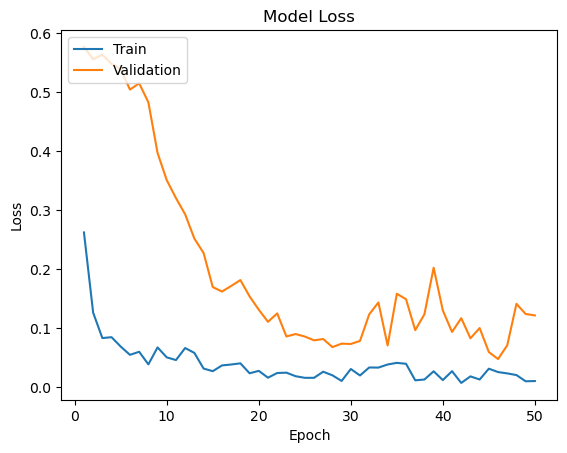

In [61]:
plotLearningCurve(history, 50)

# Conclusion:
**The Model Achieves 96.5% Accuracy on Test Data.**